
## 지도 학습 - KNN (1)

#### 이번 모듈에서 다루는 내용
- 임의데이터생성, 유방암 데이터 설명
- kNN 설명, k의 영향
- KNN모델로 유방암예측
- 
- 예) 외국에가서 낯선 나이트클럽에서 춤을 추려고 한다고 가정. 주변 사람들의 움직임을 통해서 어떤 춤을 출지 알아볼것. 주변사람중 한명을 선택해서 그 사람의 춤동작을 따라하는것. 한명만 보고 따라하기보다는 몇몇사람들을 더 관찰하고 대부분이 추는 춤을 따라하게 됨. 

=> 데이터를 설명할 수 있는 모델이 없다면 최선의 방법은 비슷한 데이터를 살펴보고 비슷한 클래스를 선택하는 것. 





In [2]:
!pip install mglearn

In [3]:
%matplotlib inline
from preamble import * #preamble모듈 에러가 나면 쥬피터파일과 같이 드린 preamble.py가 같은 폴더에 있는지 꼭 확인하세요!
from mglearn import *

In [ ]:
%matplotlib inline
from preamble import *
from mglearn import *

### 머신러닝

### 임의의 샘플 데이터 생성
- make_forge()로 임의의 x, y 데이터 샘플을 생성한다
- discrete_scatter()로 산점도를 그린다
- mglearn 패키지의 plot_helper, datasets.py, make_forge, make_blobs 등 참조

In [4]:
plt.rcParams['figure.dpi'] = 300
# 데이터셋을 만듭니다
X, y = mglearn.datasets.make_forge() #임의의 데이터 샘플 생성
print("X.shape: {}".format(X.shape))
print(X,y)

X.shape: (26, 2)
[[ 9.963  4.597]
 [11.033 -0.168]
 [11.542  5.211]
 [ 8.693  1.543]
 [ 8.106  4.287]
 [ 8.31   4.806]
 [11.93   4.649]
 [ 9.673 -0.203]
 [ 8.348  5.134]
 [ 8.675  4.476]
 [ 9.177  5.093]
 [10.24   2.455]
 [ 8.689  1.487]
 [ 8.922 -0.64 ]
 [ 9.491  4.332]
 [ 9.257  5.133]
 [ 7.998  4.853]
 [ 8.184  1.296]
 [ 8.734  2.492]
 [ 9.323  5.098]
 [10.064  0.991]
 [ 9.5   -0.264]
 [ 8.345  1.638]
 [ 9.502  1.938]
 [ 9.151  5.498]
 [11.564  1.339]] [1 0 1 0 0 1 1 0 1 1 1 1 0 0 1 1 1 0 0 1 0 0 0 0 1 0]


C:\Users\163908\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


In [8]:
plt.rcParams['figure.dpi'] = 300
X, y = mglearn.datasets.make_forge()
print("X.shape : {}".format(X.shape))
print(X, y)

X.shape : (26, 2)
[[ 9.963  4.597]
 [11.033 -0.168]
 [11.542  5.211]
 [ 8.693  1.543]
 [ 8.106  4.287]
 [ 8.31   4.806]
 [11.93   4.649]
 [ 9.673 -0.203]
 [ 8.348  5.134]
 [ 8.675  4.476]
 [ 9.177  5.093]
 [10.24   2.455]
 [ 8.689  1.487]
 [ 8.922 -0.64 ]
 [ 9.491  4.332]
 [ 9.257  5.133]
 [ 7.998  4.853]
 [ 8.184  1.296]
 [ 8.734  2.492]
 [ 9.323  5.098]
 [10.064  0.991]
 [ 9.5   -0.264]
 [ 8.345  1.638]
 [ 9.502  1.938]
 [ 9.151  5.498]
 [11.564  1.339]] [1 0 1 0 0 1 1 0 1 1 1 1 0 0 1 1 1 0 0 1 0 0 0 0 1 0]


C:\Users\jjaim\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


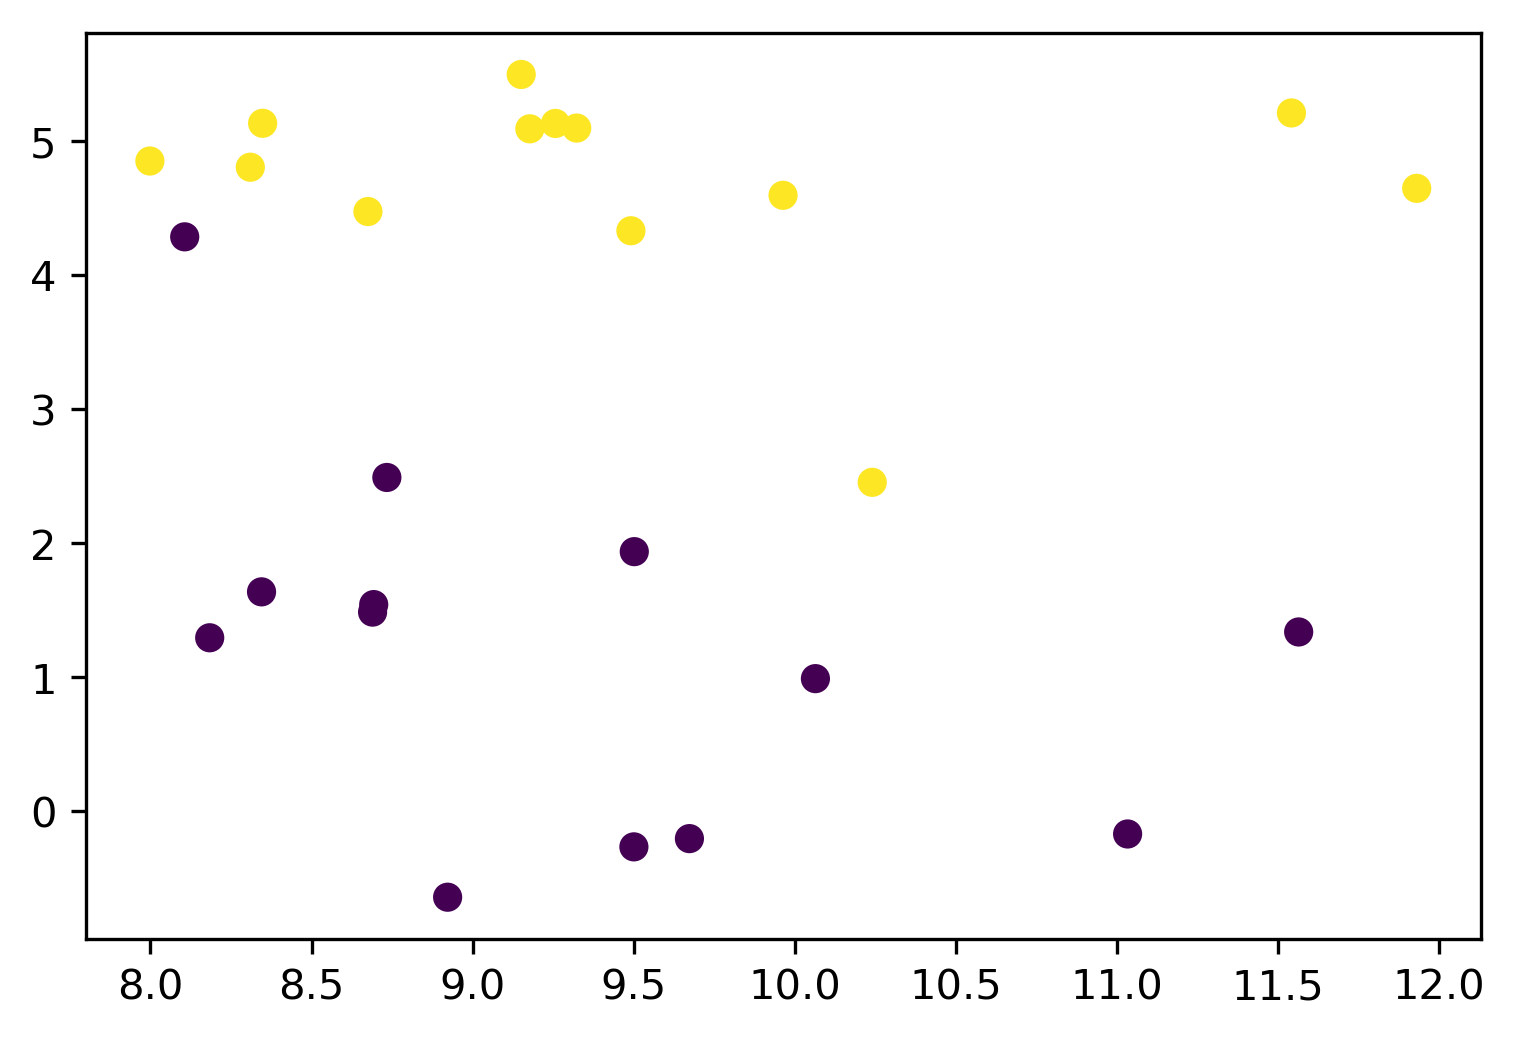

In [9]:
# # 산점도를 그립니다 (기본 함수)
plt.scatter(X[:,0], X[:,1], c=y) # 데이터 그래프

Text(0, 0.5, 'feaure1')

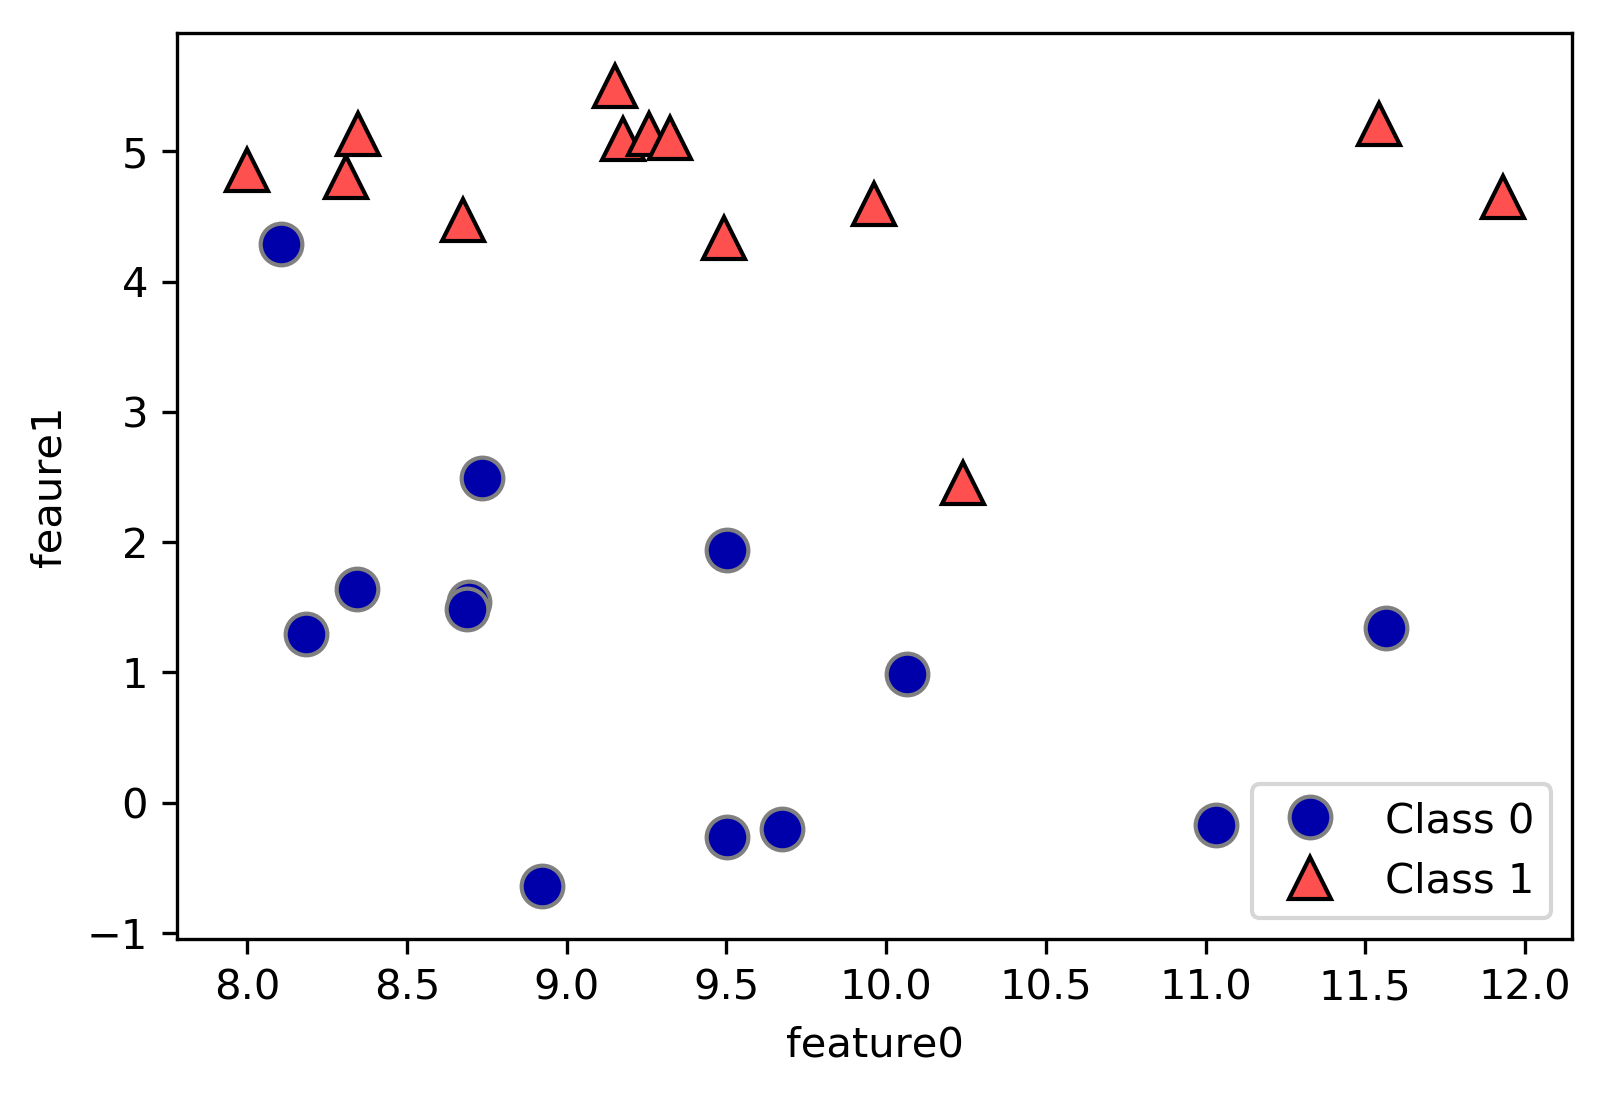

In [19]:
# mglearn 라이브러리를 사용한 (예쁜) 산점도

mglearn.discrete_scatter(X[:,0], X[:,1], y)
plt.legend(["Class 0", "Class 1"], loc=4) #legend : 범례
plt.xlabel("feature0")
plt.ylabel("feaure1")

Text(0, 0.5, 'Target')

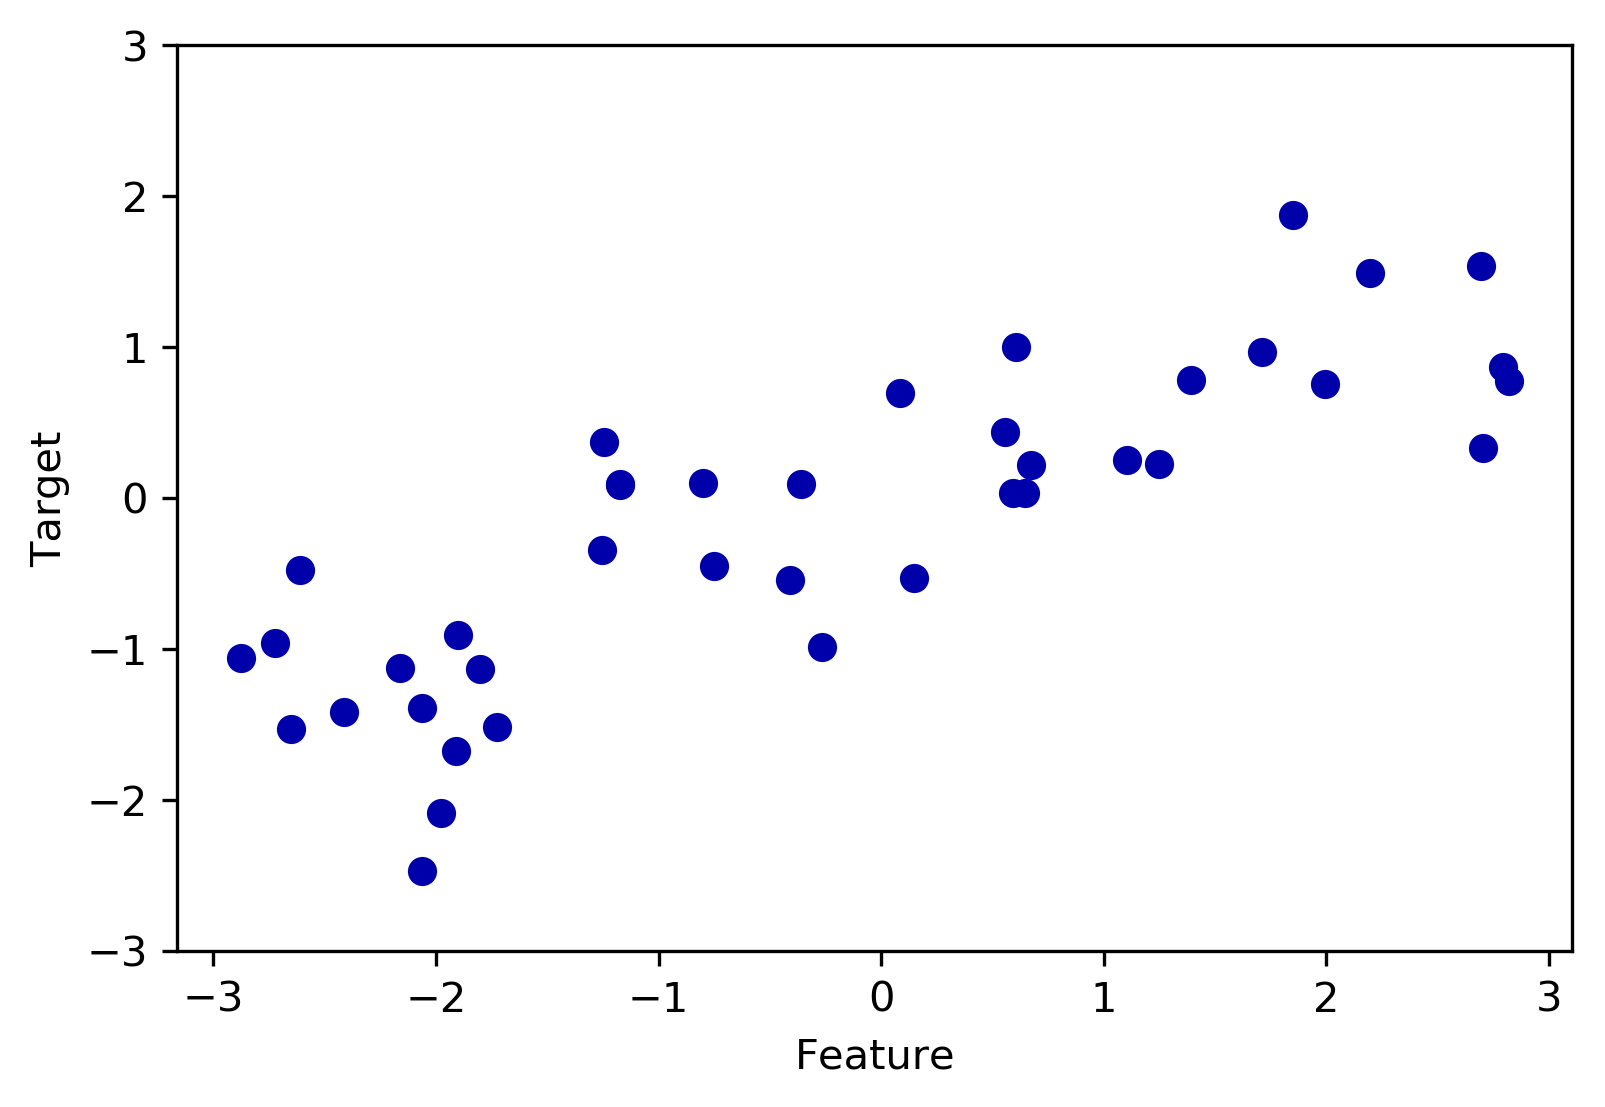

In [25]:
# 1차 선형 모델에 사용할 데이터 생성
X, y = mglearn.datasets.make_wave(n_samples=40) #회기 문제 예시를 생성
plt.plot(X, y, 'o') 
plt.ylim(-3, 3)
plt.xlabel("Feature")
plt.ylabel("Target")

### 위스콘신대 유방암 데이터
- 양성(benign)과 악성(malignant)종양에 대한 피처 데이터를 제공
- load_breast_cancer() 함수로 로드한다 (Bunch 형태의 데이터 제공, Bunch 데이터는 '.' 으로 내부 데이터 접근이 가능하다)

In [40]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer() #유명한 예제 sklearn에 있음
print("cancer.keys(): {}".format(cancer.keys()))

cancer.keys(): dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])


In [41]:
print("유방암 데이터의 형태: {}".format(cancer.data.shape))

유방암 데이터의 형태: (569, 30)


- bincount()함수를 사용하여 타겟 변수의 구성을 알아본다

In [42]:
print("클래스별 샘플 갯수:\n{}".format(
      {n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}))

클래스별 샘플 갯수:
{'malignant': 212, 'benign': 357}


In [43]:
print("특성 이름:\n{}".format(cancer.feature_names))

특성 이름:
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [44]:
print(cancer['DESCR'])

Breast Cancer Wisconsin (Diagnostic) Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        

In [45]:
cancer.DESCR

'Breast Cancer Wisconsin (Diagnostic) Database\n=============================================\n\nNotes\n-----\nData Set Characteristics:\n    :Number of Instances: 569\n\n    :Number of Attributes: 30 numeric, predictive attributes and the class\n\n    :Attribute Information:\n        - radius (mean of distances from center to points on the perimeter)\n        - texture (standard deviation of gray-scale values)\n        - perimeter\n        - area\n        - smoothness (local variation in radius lengths)\n        - compactness (perimeter^2 / area - 1.0)\n        - concavity (severity of concave portions of the contour)\n        - concave points (number of concave portions of the contour)\n        - symmetry \n        - fractal dimension ("coastline approximation" - 1)\n\n        The mean, standard error, and "worst" or largest (mean of the three\n        largest values) of these features were computed for each image,\n        resulting in 30 features.  For instance, field 3 is Mean Rad

### k-최근접 이웃

- 주어진 샘플의 특성 값을 보고 가장 가까운 특성을 가지는 이웃(neighbor)을 k개 선택하고 이들 레이블의 평균치로 이 샘플이 속할 분류를 예측하는 방식
- kNN은 직관적으로 이해하기 쉬운 분류 알고리즘으로서 추천 시스템에서 많이 사용된다
- 적절한 추천을 하기 위해서 추천을 요청한 사람의 성향을 특성들로 파악하고 그 사람과 가장 성향이 유사한 k명의 사람들이 좋아하는 품목을 추천하는 방식을 사용한다. 
- kNN알고리즘을 협업 필터링(collaborative filtering)이라고도 부른다.


#### k-최근접 이웃 분류 - 훈련 데이터셋을 저장만 하는 것이 모델을 만드는 전 과정이다
- k=1일 때는, 가장 가까운 샘플로 분류하는 방식
- 아래 그림에서는 임의로 3개의 별표로 표시된 점을 나타냈고 가장 가까운 샘플을 연결했다

C:\Users\ccby0476\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


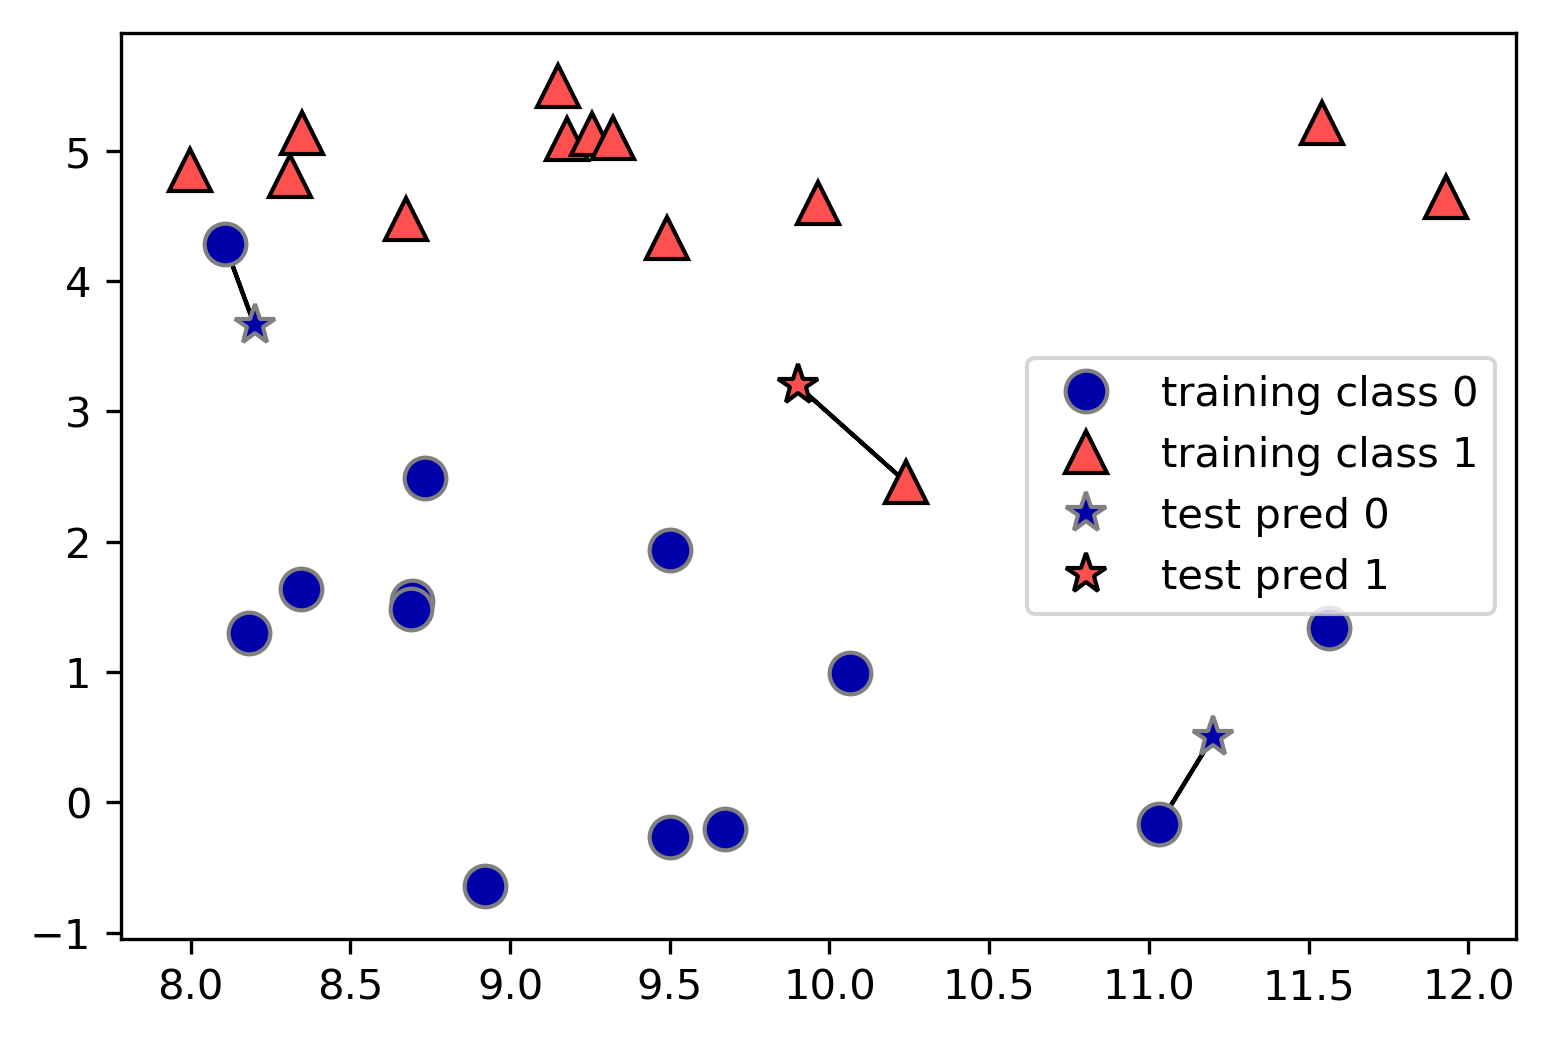

In [66]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

- k=3일 때의 예를 들었다
- 결과를 보면 k=1일 때에 비하여 분류 결과가 달라진 것을 알 수 있다 -> 예측이 바뀜!

C:\Users\ccby0476\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


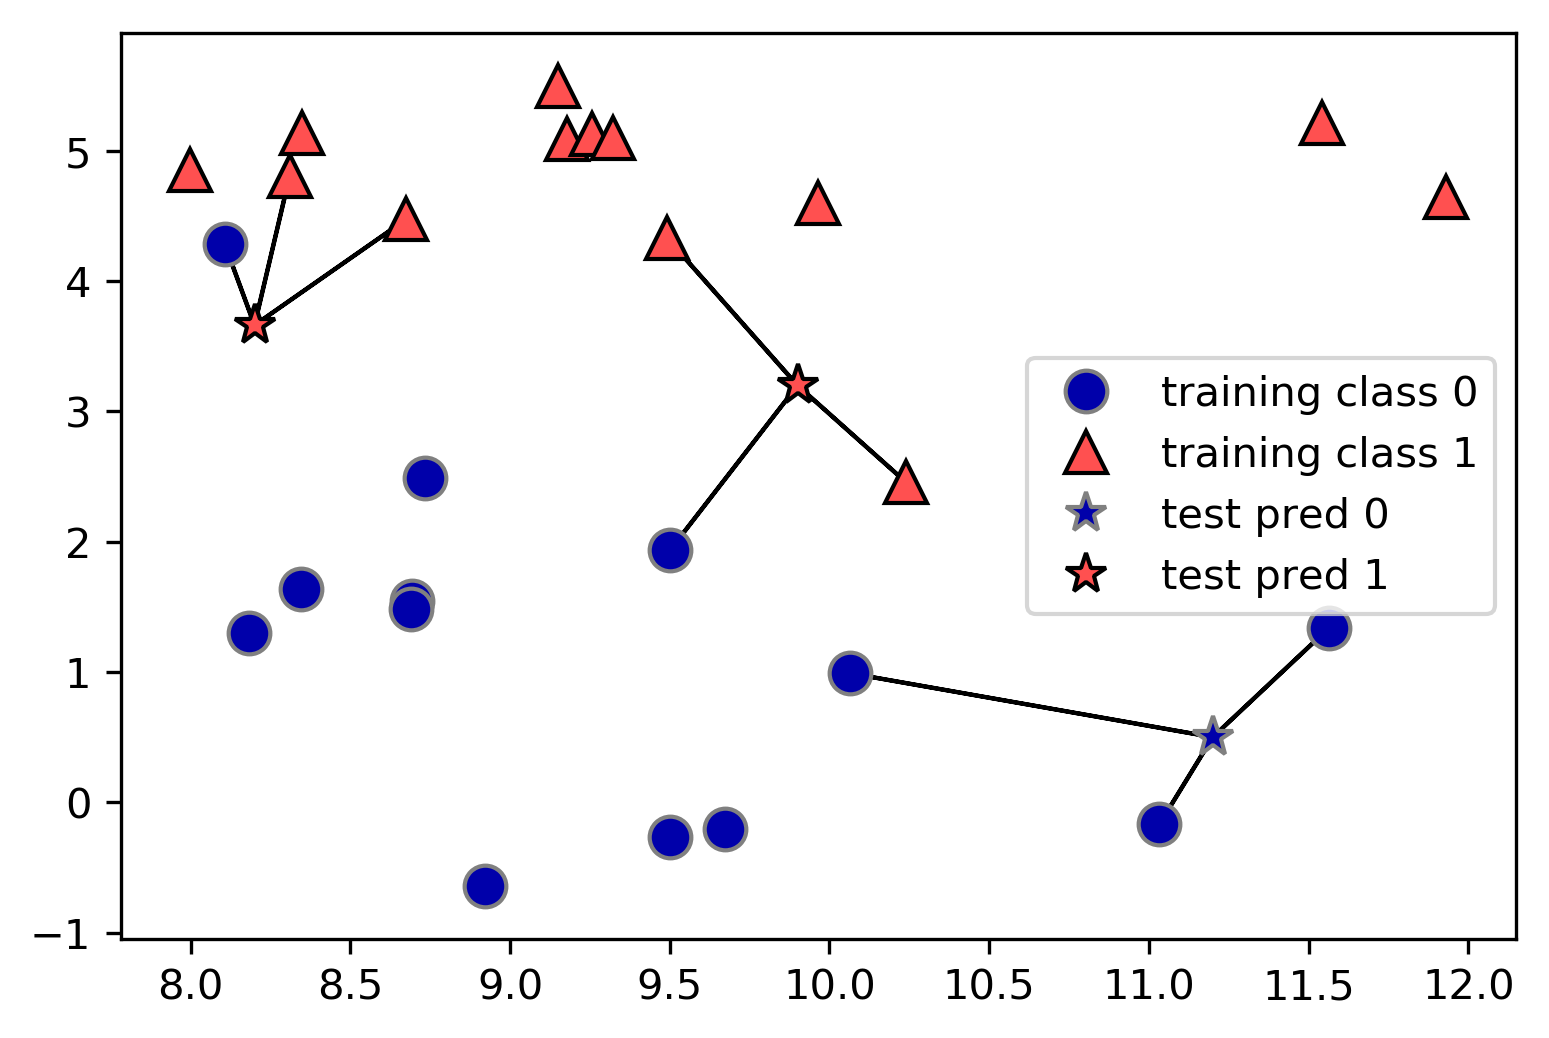

In [67]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

### scikit-learn을 사용
- 훈련데이터와 테스트 데이터를 나눈다 (split)

In [9]:
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=15)

C:\Users\163908\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


In [10]:
print(X.shape)

(26, 2)


In [11]:
print(X_train.shape)

(19, 2)


In [12]:
print(X_test.shape)

(7, 2)


In [13]:
print(X_test)

[[ 7.998  4.853]
 [ 9.502  1.938]
 [11.542  5.211]
 [11.033 -0.168]
 [11.93   4.649]
 [11.564  1.339]
 [ 9.323  5.098]]


### 모델객체생성

In [41]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

 k = 1,2,...,  26  결과비교

### 모델학습

In [42]:
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

- fit에서 학습하는 작업은 단순히 데이터를 저장하는 작업만 한다
- predict를 수행해보고, score를 사용해서 정밀도를 검증해본다

### 예측

In [43]:
print("테스트 세트 예측: {}".format(clf.predict(X_test)))

테스트 세트 예측: [1 0 1 0 1 0 1]


### 모델평가

In [44]:
print("테스트 세트 정확도: {:.2f}".format(clf.score(X_test, y_test)))

테스트 세트 정확도: 1.00


#### KNeighborsClassifier 분석
- k 값의 변화에 따른 분류 경계의 변화

- k 값을 너무 작게 잡으면 주변 데이터에 너무 예민하게 반응하고 k 값을 너무 크게 잡으면 주변에 너무 많은 데이터의 평균치를 사용하므로 분류가 무뎌진다. 
- 극단적으로 k=N (전체 샘플 수)로 잡으면 항상 전체 데이터의 평균치 값을 예측하게 된다. 
- 영화 추천에서 k=N으로 한다면 이는 평균적으로 가장 많은 사람들이 본 영화 즉, 종합 베스트셀러를 추천하는 것과 같다. 
- k값을 작게 잡으면 노이즈에 민감하나 정확도는 올라가고 k를 크게 잡을수록 노이즈에 강하나 정밀한 예측이 어렵다. 
- kNN의 단점은 훈련시간이 거의 없는 것에 비해 분류를 처리하는 시간, 즉 알고리즘을 수행하는 시간이 길다는 것이다. 


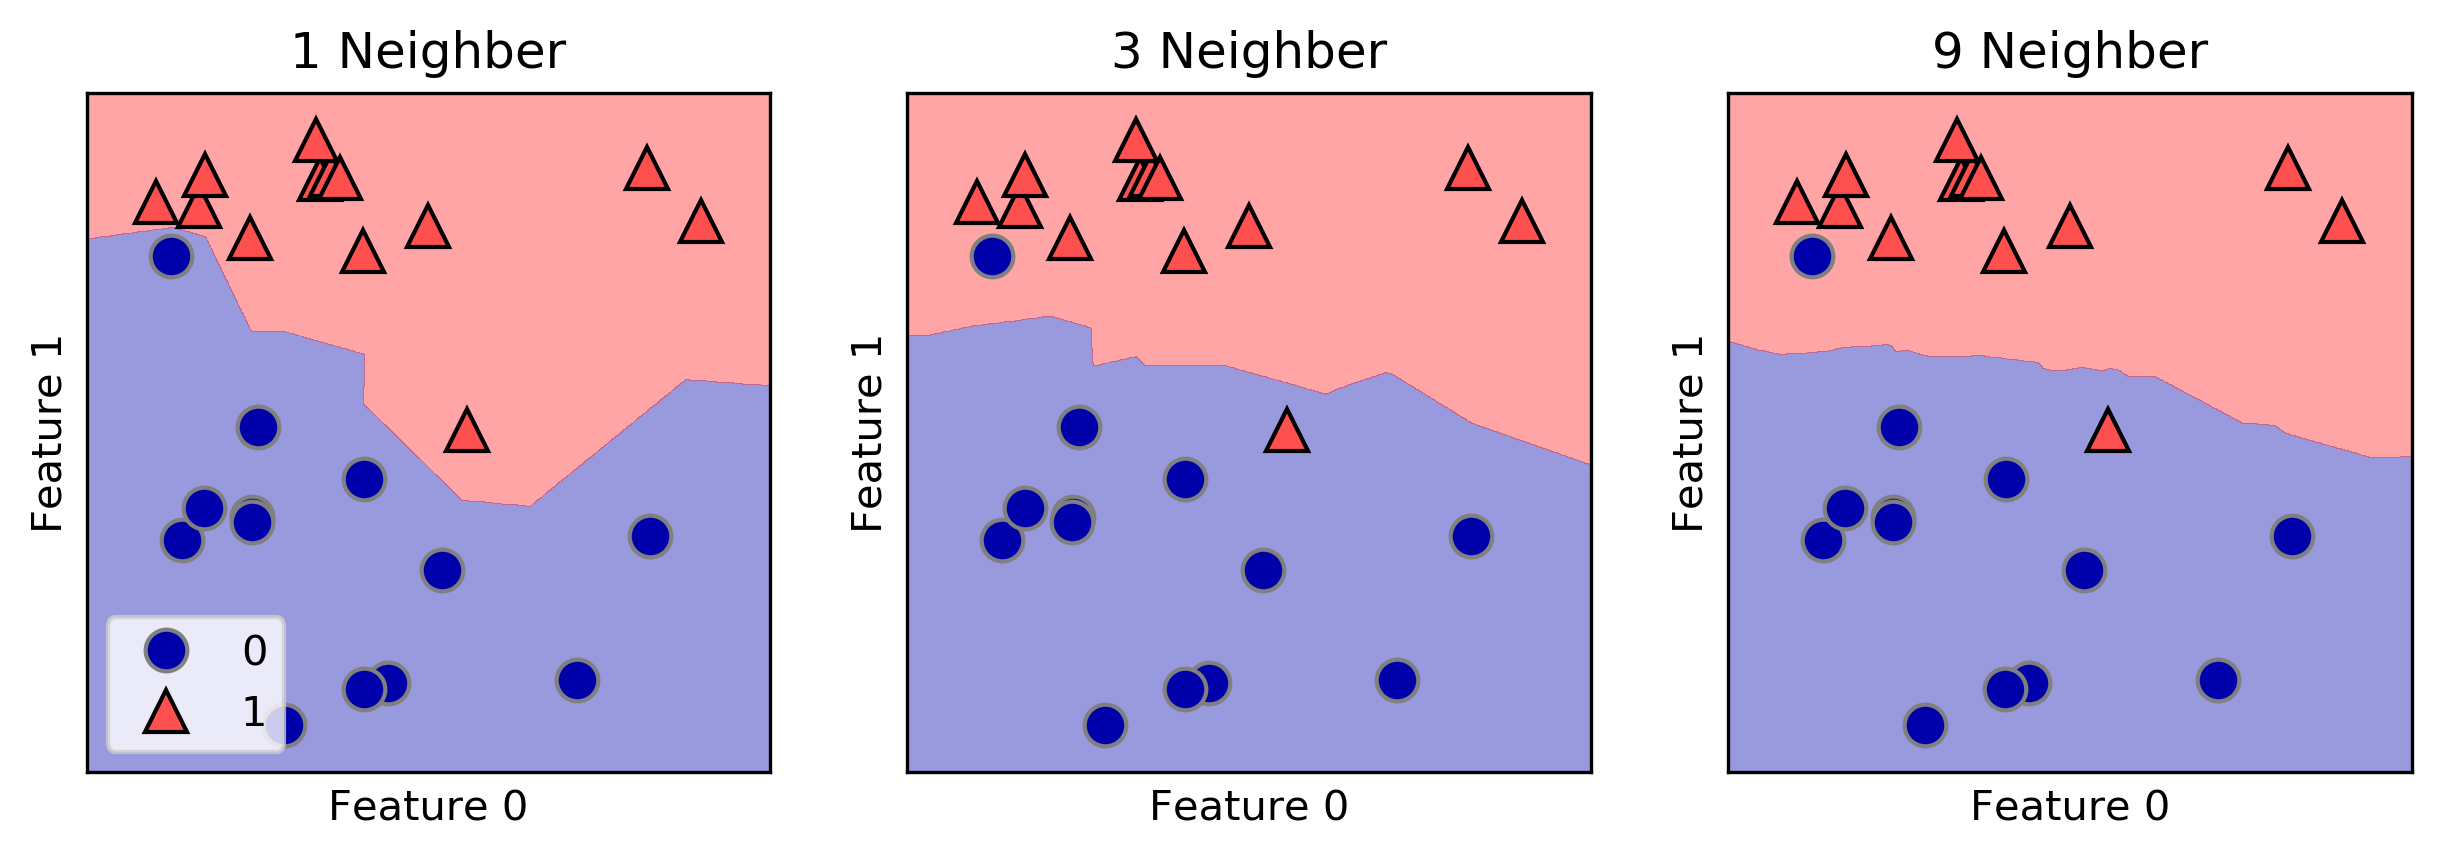

In [57]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n_neighbors, ax in zip([1, 3, 9], axes):
    # fit 메소드는 모델 객체를 리턴합니다
    # 그래서 객체 생성과 fit 메소드를 한 줄에 쓸 수 있습니다
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} Neighber".format(n_neighbors))
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
axes[0].legend(loc=3)
# k=1: 결정경계가 훈련데이터를 그대로 따른다
# k가 증가하면서 결정경계는 더 부드러워짐 (최종적으로는 평균치에 수렴한다)
# k=N (훈련데이터전체개수) 이상이면 평균치로 분류한다

### 유방암 데이터에 대한   kNN 적용
- k 값을 1~10까지 변경
- 훈련데이터 및 테스트데이터에 대한 정확도를 그려본다

In [88]:
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge() #회귀문제 

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=15)

training_accuracy = []
test_accuracy = []
# 1 에서 10 까지 n_neighbors 를 적용
neighbors_settings = range(1,20)
for n_neighbors in neighbors_settings:
    # 모델 생성
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # 훈련 세트 정확도 저장
    training_accuracy.append(clf.score(X_train, y_train))
    # 일반화 정확도 저장

    test_accuracy.append(clf.score(X_test, y_test))
    print(n_neighbors, clf.score(X_train, y_train))
    print(n_neighbors, clf.score(X_test, y_test))
    

1 1.0
1 1.0
2 0.9473684210526315
2 1.0
3 0.8947368421052632
3 1.0
4 0.8947368421052632
4 1.0
5 0.8947368421052632
5 1.0
6 0.8947368421052632
6 1.0
7 0.8947368421052632
7 1.0
8 0.8947368421052632
8 1.0
9 0.8947368421052632
9 1.0
10 0.8947368421052632
10 1.0
11 0.8947368421052632
11 1.0
12 0.8947368421052632
12 1.0
13 0.8947368421052632
13 1.0
14 0.8947368421052632
14 1.0
15 0.8421052631578947
15 1.0
16 0.8947368421052632
16 1.0
17 0.8947368421052632
17 1.0
18 0.5263157894736842
18 0.42857142857142855
19 0.5263157894736842
19 0.42857142857142855


C:\Users\ccby0476\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


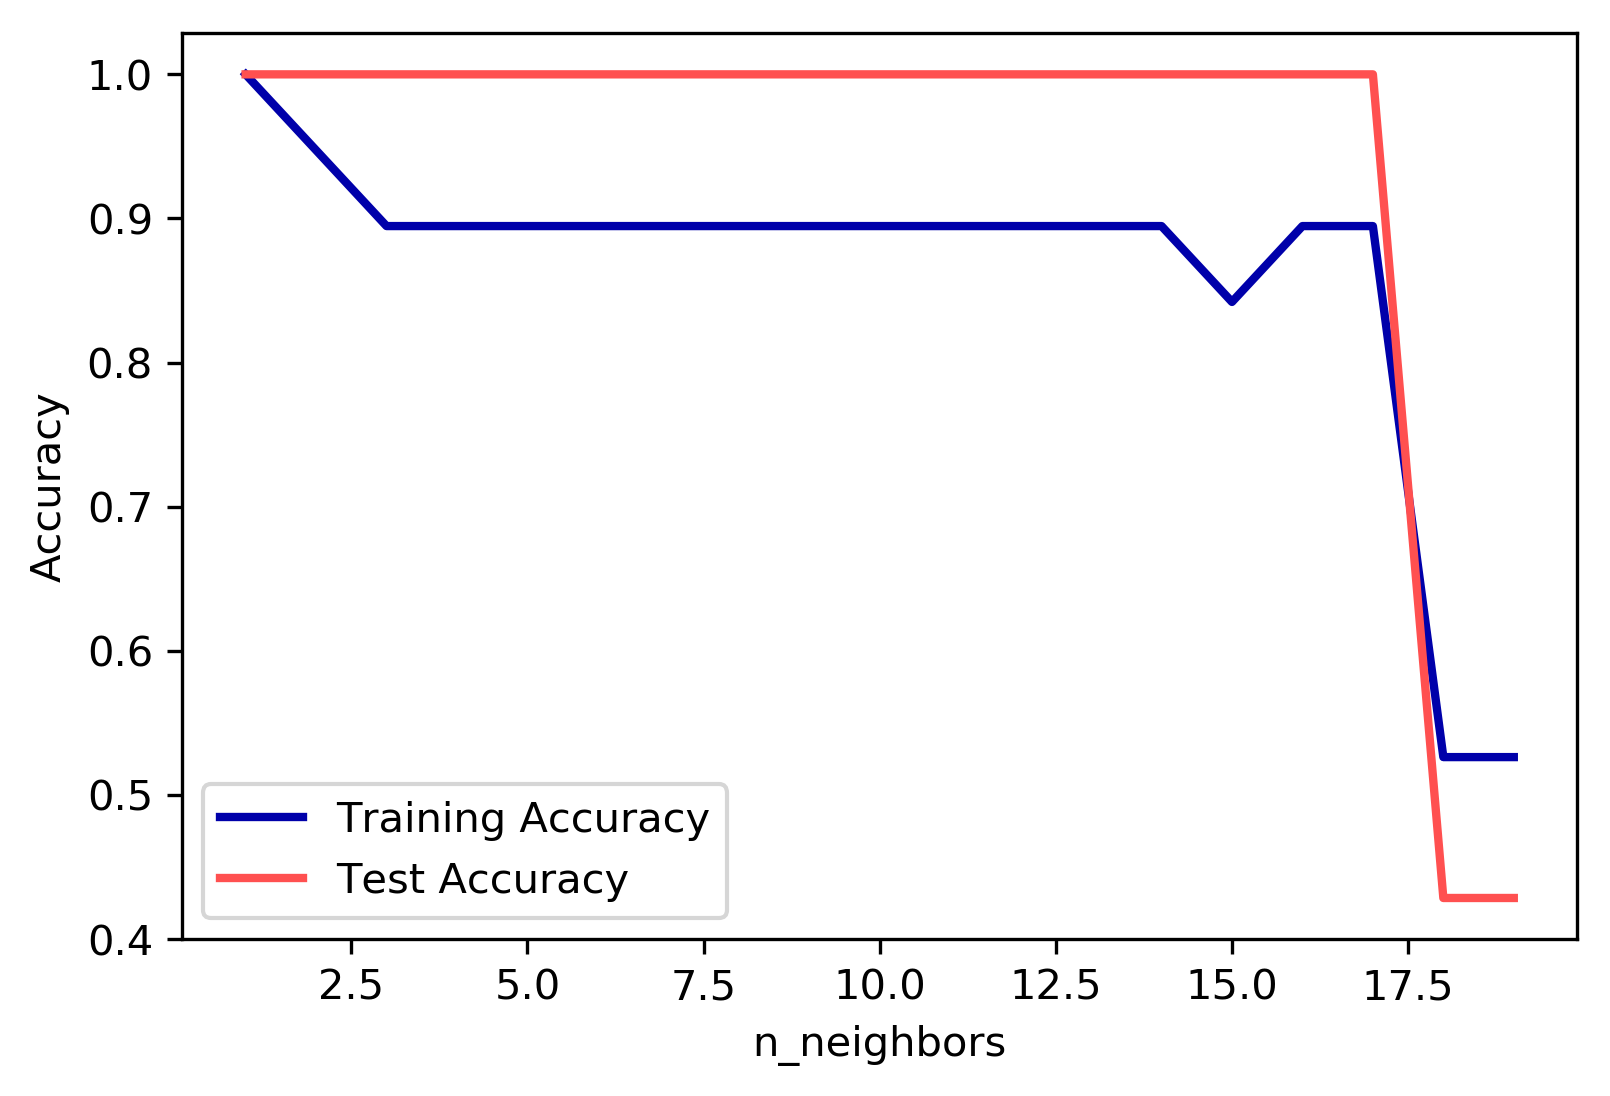

In [59]:
plt.plot(neighbors_settings, training_accuracy, label="Training Accuracy")
plt.plot(neighbors_settings, test_accuracy, label="Test Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
#n_neighbor수에 따른 훈련세트와 테스트세트의 정확도를 보여줌

In [60]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=66)

training_accuracy = []
test_accuracy = []
# 1 에서 10 까지 n_neighbors 를 적용
neighbors_settings = range(1,20)
for n_neighbors in neighbors_settings:
    # 모델 생성
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # 훈련 세트 정확도 저장
    training_accuracy.append(clf.score(X_train, y_train))
    # 일반화 정확도 저장

    test_accuracy.append(clf.score(X_test, y_test))
    print(n_neighbors, clf.score(X_train, y_train))
    print(n_neighbors, clf.score(X_test, y_test))
    
#테스트 데이터 점수가 가장 높기 때문에 6이 최적점이 된다.

1 1.0
1 0.9020979020979021
2 0.9765258215962441
2 0.8881118881118881
3 0.9577464788732394
3 0.9230769230769231
4 0.9553990610328639
4 0.9230769230769231
5 0.9483568075117371
5 0.9230769230769231
6 0.9460093896713615
6 0.9370629370629371
7 0.9436619718309859
7 0.9300699300699301
8 0.9413145539906104
8 0.9300699300699301
9 0.9342723004694836
9 0.916083916083916
10 0.9389671361502347
10 0.916083916083916
11 0.9342723004694836
11 0.916083916083916
12 0.9342723004694836
12 0.916083916083916
13 0.9413145539906104
13 0.916083916083916
14 0.9413145539906104
14 0.916083916083916
15 0.9366197183098591
15 0.9230769230769231
16 0.9389671361502347
16 0.9230769230769231
17 0.9413145539906104
17 0.9230769230769231
18 0.9413145539906104
18 0.9230769230769231
19 0.9389671361502347
19 0.9230769230769231


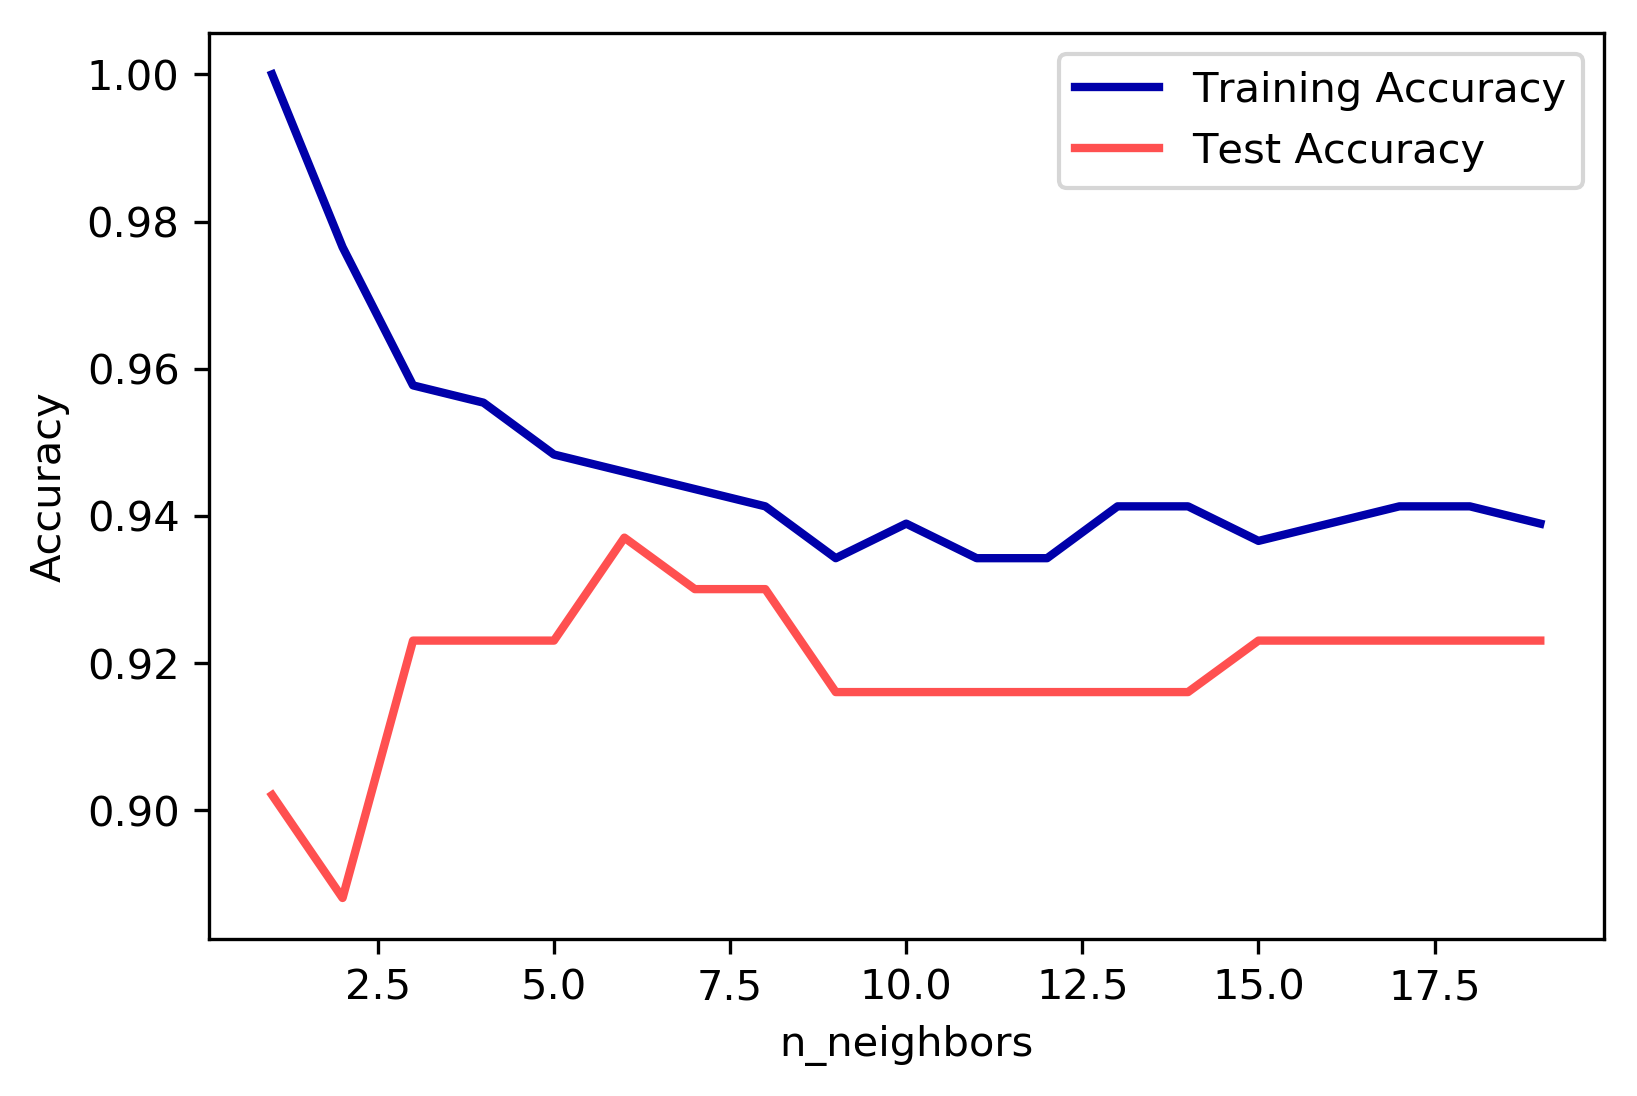

In [61]:
plt.plot(neighbors_settings, training_accuracy, label="Training Accuracy")
plt.plot(neighbors_settings, test_accuracy, label="Test Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
#n_neighbor수에 따른 훈련세트와 테스트세트의 정확도를 보여줌